In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [26]:
houses = pd.read_csv("kc_house_data.csv")
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
houses.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

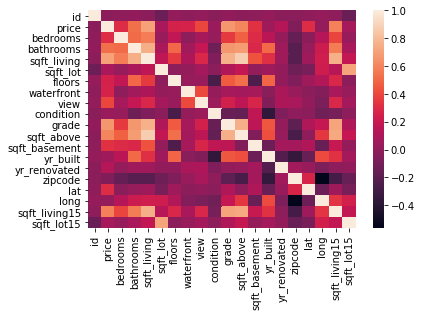

In [28]:
corr = houses.corr()
sns.heatmap(corr)

In [29]:
import numpy as np
feature='sqft_living'
x=np.array(houses[feature].values)
x=x.reshape(-1,1)
y=houses.price

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
c=lr.intercept_
m=lr.coef_

In [33]:
price = lr.intercept_ + 1000*lr.coef_
area=[1000]
area=np.array(area)
area=area.reshape(-1,1)
print(lr.predict(area))

[235957.38009823]


In [34]:
mse = mean_squared_error(y_test, lr.predict(x_test))
print("mse is: "+ str(np.sqrt(mse)))
print("accuracy: "+ str(lr.score(x_test,y_test)))

mse is: 259816.19395573094
accuracy: 0.4934737025645349


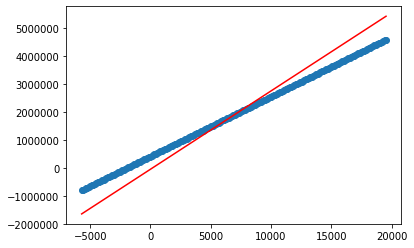

In [44]:
max_x=np.max(x)+1000
min_x=np.min(x)-1000

x=np.linspace(min_x,max_x,210)
y0 = m*x + c 

plt.scatter(x, y)
plt.plot(x, y0, color='red')
plt.show()